### Sorbonne Université
### L3 - Mathématiques - Analyse Numérique (LU3MA232)

---

<center> <h1>TP6 : Schémas symplectiques pour un système hamiltonien</h1> </center>

---

In [40]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction 

Dans ce TP, nous nous intéressons à l'intégration d'un système Hamiltonien : le mouvement d'une planète autour d'un astre. La masse de l'astre étant supposée beaucoup plus grande que celle de la planète, nous considérerons l'astre comme étant fixe et à l'origine de notre repère. La planète est modélisée par un vecteur position $q$ et un vecteur vitesse $p$. La seule force agissant sur la planête est la force de gravitation entre la planète et l'astre, par conséquent la deuxième loi de Newton donne :
$$ \frac{d^2 q}{d t^2 } = -\frac{\mu q}{||q||^3} $$
où $\mu = G m$, $G$ étant la constante universelle de gravitation et $m$ la masse de l'astre. Dans toute la suite du TP, nous supposerons que le problème est adimensionné et nous prendrons $\mu = 1$. 

La conservation du moment cinétique nous permet d'affirmer que le mouvement est plan. De ce fait, nous considérons que $(q, p) \in \mathbb{R}^2 \times \mathbb{R}^2$. Le système d'EDO à résoudre s'écrit alors:
$$ (E) \left\lbrace
\begin{aligned}
&q'(t) = p(t), \\
&p'(t) = -\frac{q(t)}{||q(t)||^3}, \\
&q(0) = q_0, \\ 
&p(0) = p_0.
\end{aligned}
\right.$$



## I- Approche naïve : le schéma d'Euler explicite

La première résolution proposée est une résolution naïve via la méthode d'Euler explicite (à pas constant): 

$$ \left\lbrace
\begin{aligned}
&q_{n+1} = q_n + h  p_n, \\
&p_{n+1} = p_n  - h \frac{q_n}{||q_n||^3}
\end{aligned}
\right.$$

avec $||q||=\sqrt{q[0]^2 + q[1]^2}$ la norme euclidienne dans $\mathbb{R}^2$. 

1) Écrire une fonction $EulerExplicite(q_0, p_0, T, N)$ prenant en entrée un couple de position-vitesse initiales $q_0, p_0$, un temps final $T$ et nombre d'étapes $N$ qui renvoie une matrice $M$ de taille $4 \times (N+1)$ comportant sur les deux premières lignes l'ensemble des positions approchées par le schéma d'Euler explicite $\left( q_n \right)_{0 \leq n \leq N}$ et sur les deux dernières lignes l'ensemble des vitesses approchées par le schéma d'Euler explicite $\left( p_n \right)_{0 \leq n \leq N}$. 


In [41]:
def EulerExplicite(q_0,p_0,T,N):
    h = T/N
    M = np.zeros((4,N+1))
    M[0,0] = q_0[0]
    M[1,0] = q_0[1]
    M[2,0] = p_0[0]
    M[3,0] = p_0[1]
    
    for n in range(N):
        norm = np.sqrt(M[0,n]**2 + M[1,n]**2)
        M[0,n+1] = M[0,n] + h*M[2,n]
        M[1,n+1] = M[1,n] + h*M[3,n]
        M[2,n+1] = M[2,n] - h*M[0,n]/(norm**3)
        M[3,n+1] = M[3,n] - h*M[1,n]/(norm**3)
    
    return M

2) Écrire une fonction $Courbe(M)$ prenant en entrée une matrice $M$ de taille $4 \times (N+1)$ et qui affiche le graphe de la seconde ligne de la matrice $M$ en fonction de la première ligne de $M$. On marquera par une croix la position initiale, grâce à la fonction *plt.plot(M[0,0], M[1,0], marker="x")*.

In [42]:
def Courbe(M):
    plt.plot(M[0,:],M[1,:]) # trace la seconde ligne en fonction de la première
    plt.plot(M[0,0],M[1,0],marker='x') # trace la position initiale
    plt.show()

3) En utilisant les fonctions $EulerExplicite$ et $Courbe$, afficher la trajectoire de la planète calculée par la méthode d'Euler explicite avec les paramètres $e=0.1$, $q_0 = [1-e,0]$, $p_0 = \left[0, \sqrt{\frac{1+e}{1-e}}\right]$, $T=40.0$ et $N=1000$. 

Que remarquez vous ? (On rappelle que l'orbite théorique d'une planète autour de son astre est une ellipse d'eccentricité $e$.)

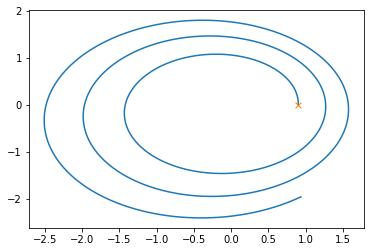

In [43]:
e = 0.1 # eccentricité de l'orbite
q_0 = [1-e, 0] # position initiale
p_0 = [0, np.sqrt((1+e)/(1-e))] # vitesse initiale
T = 40 # temps final
N = 1000

M = EulerExplicite(q_0,p_0,T,N)
Courbe(M)

**Remarque :** Au lieu d'être une ellipse fermée, la trajectoire approchée décrit une spirale vers l'extérieur.

4) Deux quantités sont conservées théoriquement au cours du temps par le système : 
- le moment cinétique
$$ L(t) =  q[0](t)p[1](t) - q[1](t)p[0](t), $$
- l'énergie mécanique totale
$$ H(t) = \frac{||p(t)||^ 2 }{2} - \frac{1}{||q(t)||}. $$ 

Écrire une fonction $Constantes(M,t)$ qui prend en entrée une matrice $M$ position-vitesse de taille $4 \times (N+1)$ et un tableau des temps $t = [t_0, ..., t_N]$, et qui affiche les courbes de $L$ et $H$ en fonction du temps. 

Remarque : pour voir les petites variations, il vaut mieux tracer $L$ et $H$ sur des graphiques séparés.

In [44]:
def Constantes(M,t):
    L = M[0,:]*M[3,:] - M[1,:]*M[2,:]

    norm_q = np.sqrt(M[0,:]**2 + M[1,:]**2) 
    norm_p = np.sqrt(M[2,:]**2 + M[3,:]**2) 
    H = 0.5*norm_p**2 - 1/norm_q
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(t,L,label="L")
    plt.title("Évolution de L")

    plt.subplot(122)
    plt.plot(t,H)
    plt.title("Évolution de H")

    plt.show()

5) Appliquer la fonction $Constantes$ à la solution numérique donnée par la méthode d'Euler explicite, pour les mêmes paramètres que précédemment. Que constatez vous ? 

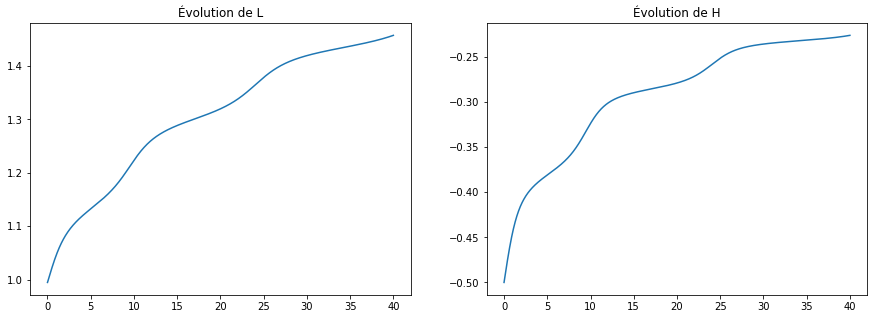

In [45]:
M = EulerExplicite(q_0,p_0,T,N)
temps = np.linspace(0,T,N+1)
Constantes(M,temps)

**Remarque :** Les fonctions $L$ et $H$ ne sont pas constantes, elles augmentent au cours du temps.

## II- Un premier schéma symplectique : Euler symplectique

On introduit le schéma d'Euler symplectique (à pas constant) défini par : 

$$ \left\lbrace
\begin{aligned}
&q_{n+1} = q_n + h p_n, \\
&p_{n+1} = p_n - h \frac{ q_{n+1}}{||q_{n+1}||^3}.
\end{aligned}
\right. $$

6) Écrire une fonction $EulerSympl(q_0, p_0, T, N)$ prenant en entrée un couple de position-vitesse initiales $q_0, p_0$, un temps final $T$ et nombre d'étapes $N$ qui renvoie une matrice de taille $4 \times (N+1)$ comportant sur les deux premières lignes l'ensemble des positions approchées par le schéma d'Euler symplectique $\left( q_n \right)_{0 \leq n \leq N }$ et sur les deux dernières lignes l'ensemble des vitesses approchées par le schéma d'Euler symplectique $\left( p_n \right)_{0 \leq n \leq N }$.  

In [46]:
def EulerSympl(q_0,p_0,T,N):
    h = T/N
    M = np.zeros((4,N+1))
    M[0,0] = q_0[0]
    M[1,0] = q_0[1]
    M[2,0] = p_0[0]
    M[3,0] = p_0[1]

    for n in range(0,N):
        M[0,n+1] = M[0,n] + h*M[2,n]
        M[1,n+1] = M[1,n] + h*M[3,n]

        norm = np.sqrt(M[0,n+1]**2 + M[1,n+1]**2)
        M[2,n+1] = M[2,n] - h*M[0,n+1]/(norm**3)
        M[3,n+1] = M[3,n] - h*M[1,n+1]/(norm**3)

    return M

7) En utilisant les fonctions $EulerSympl$ et de $Courbe$, afficher la trajectoire de la planète calculée par la méthode d'Euler symplectique avec les paramètres $e=0.1$, $q_0 = [1-e,0]$, $p_0 = \left[0, \sqrt{\frac{1+e}{1-e}}\right]$, $T=40.0$ et $N=1000$. Que remarquez vous ?

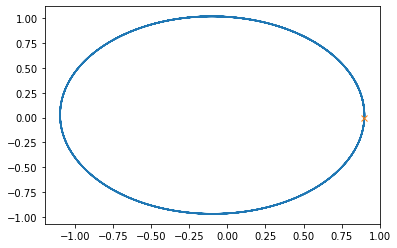

In [47]:
M = EulerSympl(q_0,p_0,T,N)
Courbe(M)

**Remarque :** À présent, la trajectoire est bien une ellipse et non plus une spirale.

8) Appliquer la fonction $Constantes$ à la solution numérique donnée par la méthode d'Euler symplectique, pour les mêmes paramètres que précédemment. Que constatez vous ? 

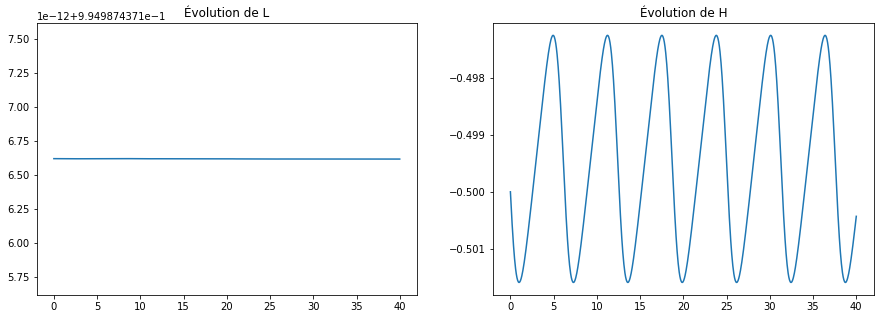

In [48]:
M = EulerSympl(q_0,p_0,T,N)
temps = np.linspace(0,T,N+1)
Constantes(M,temps)

**Remarque :** À présent, la fonction $L$ est vraiment constante. La fonction $H$ ne l'est toujours pas, mais au lieu de diverger elle oscille autour d'une valeur d'équilibre. Cela signifie que les erreurs ne s'accumulent pas au cours du temps.

## III- Comparaison de schémas d'ordre plus élevé

On peut légitimement remettre en question la pertinence du choix d'un schéma d'Euler explicite pour des échelles de temps $T$ grandes, étant donné qu'il est "seulement" d'ordre 1. Nous allons comparer deux schémas d'ordre 2 : le schéma RK2 (non symplectique) et le schéma du point milieu (symplectique).  

9) Rappelons que le tableau de Butcher du schéma RK2 est :
$$\begin{array}{c|cc}
0&0&0\\
1&1&0\\
\hline
&1/2&1/2\end{array}$$

Écrire une fonction $RK2(q_0, p_0, T, N)$ qui calcule une solution approchée du problème $(E)$ via le schéma RK2.


In [49]:
def RK2(q_0,p_0,T,N):
    h = T/N
    M = np.zeros((4,N+1))
    M[0,0] = q_0[0]
    M[1,0] = q_0[1]
    M[2,0] = p_0[0]
    M[3,0] = p_0[1]

    for n in range(0,N):
        yn1 = np.copy(M[:,n])

        fn1 = np.zeros(4)
        fn1[0] = yn1[2]
        fn1[1] = yn1[3]
        norm = np.sqrt(yn1[0]**2 + yn1[1]**2)
        fn1[2] = - yn1[0]/norm**3
        fn1[3] = - yn1[1]/norm**3

        yn2 = M[:,n] + h*fn1

        fn2 = np.zeros(4)
        fn2[0] += yn2[2]
        fn2[1] += yn2[3]
        norm = np.sqrt(yn2[0]**2 + yn2[1]**2)
        fn2[2] += - yn2[0]/norm**3
        fn2[3] += - yn2[1]/norm**3
        
        M[:,n+1] = M[:,n] + h*(fn1/2 + fn2/2)
    return M

Dans notre cas, le schéma du point milieu s'écrit : 

$$ \left\lbrace
\begin{aligned}
&q_{n+1} = q_n + h \times \frac{p_n + p_{n+1}}{2}, \\
&p_{n+1} = p_n - h \times \frac{4 \left(q_n + q_{n+1}\right)}{||q_n + q_{n+1}||^3}.
\end{aligned}
\right. $$

Ce schéma étant implicite, nous allons devoir, à chaque étape $n$, trouver les zéros d'une fonction afin de calculer les valeurs à l'étape $n+1$.

10) Écrire la fonction $F(h, q_n, p_n, x,y)$ définie par :

$$ F(h, q_n, p_n, x,y) =  \left(
\begin{aligned}
&x - q_n - h \times \frac{p_n + y}{2}  \\
&y - p_n + h \times \frac{4 (q_n + x)}{||q_n + x||^3}
\end{aligned}
\right).$$

Cette fonction est telle que si le couple $(x,y)$ est solution de $F(h, q_n, p_n, x, y) = 0$, alors $q_{n+1} = x$ et $p_{n+1} = y$. On remarquera que, puisque $q_n, p_n \in \mathbb{R}^2$, on a $F(h,q_n,p_n,x,y) \in \mathbb{R}^4$.  

In [50]:
def F(h,qn,pn,x,y):
    res = np.zeros(4)
    norm = np.sqrt( (qn[0] + x[0])**2 + (qn[1] + x[1])**2 )
    
    res[0] = x[0] - qn[0] - h*(pn[0] + y[0])/2
    res[1] = x[1] - qn[1] - h*(pn[1] + y[1])/2
    res[2] = y[0] - pn[0] + 4*h*(qn[0] + x[0])/norm**3
    res[3] = y[1] - pn[1] + 4*h*(qn[1] + x[1])/norm**3

    return res

11) Écrire une fonction $dF(h,q_n,p_n,x,y)$ qui renvoie la dérivée de $F$ par rapport aux variables $x$ et $y$. Autrement dit, puisque $x,y \in \mathbb{R}^2$ et $F(h,q_n,p_n,x,y) = \left(\begin{array}{c} F_1(h,q_n,p_n,x,y) \\ F_2(h,q_n,p_n,x,y) \\ F_3(h,q_n,p_n,x,y) \\ F_4(h,q_n,p_n,x,y) \end{array}\right) \in \mathbb{R}^4$, la fonction $dF$ doit renvoyer la matrice 

$$J = \left(\begin{array}{cccc} 
\frac{\partial F_1}{\partial x[0]} & \frac{\partial F_1}{\partial x[1]} & \frac{\partial F_1}{\partial y[0]} & \frac{\partial F_1}{\partial y[1]} \\
\frac{\partial F_2}{\partial x[0]} & \frac{\partial F_2}{\partial x[1]} & \frac{\partial F_2}{\partial y[0]} & \frac{\partial F_2}{\partial y[1]} \\
\frac{\partial F_3}{\partial x[0]} & \frac{\partial F_3}{\partial x[1]} & \frac{\partial F_3}{\partial y[0]} & \frac{\partial F_3}{\partial y[1]} \\
\frac{\partial F_4}{\partial x[0]} & \frac{\partial F_4}{\partial x[1]} & \frac{\partial F_4}{\partial y[0]} & \frac{\partial F_4}{\partial y[1]}
\end{array}\right) \in \mathcal{M}_{4,4}(\mathbb{R}) $$

In [51]:
def dF(h,qn,pn,x,y):
    res = np.zeros((4,4))
    norm = np.sqrt( (qn[0] + x[0])**2 + (qn[1] + x[1])**2 )
    
    res[0,0] = 1
    res[0,2] = -h/2
    
    res[1,1] = 1
    res[1,3] = -h/2

    res[2,0] = 4*h*(norm**2 - 3*(qn[0]+x[0])**2)/norm**5
    res[2,1] = 4*h*(qn[0]+x[0])*( -3*(qn[1]+x[1]) )/norm**5
    res[2,2] = 1

    res[3,0] = 4*h*(qn[1]+x[1])*( -3*(qn[0]+x[0]) )/norm**5
    res[3,1] = 4*h*(norm**2 - 3*(qn[1]+x[1])**2)/norm**5
    res[3,3] = 1

    return res

12) Écrire une fonction $NewtonF(h, q_n, p_n, prec)$ permettant de calculer une approximation d'un zéro de $F(h, q_n, p_n, \cdot, \cdot)$ avec une précision égale à $prec$. Pour cela, on utilisera l'algorithme de Newton en multi-D. 

Nous rappelons que la résolution d'un système linéaire de type $A X =  b$ est donnée par la fonction $np.linalg.solve(A, b)$.

Traditionnellement, pour résoudre un schéma numérique, la méthode de Newton est initialisée avec $x_0 = q_n$ et $y_0 = p_n$.

In [52]:
def NewtonF(h,qn,pn,prec):
    x = qn
    y = pn
    compt = 0

    while np.max(np.abs( F(h,qn,pn,x,y) )) > prec:
        if compt > 1000:
            print("Erreur : NewtonF ne semble pas converger")
            return

        Inv = np.linalg.solve(dF(h,qn,pn,x,y),F(h,qn,pn,x,y))
        
        x = x - Inv[0:2]
        y = y - Inv[2:]
        compt = compt+1

    return x,y

x,y = NewtonF(0.1, np.array([1,1]), np.array([0,0]), 10**(-9))
print( max(np.abs(F(0.1, np.array([1,1]), np.array([0,0]), x, y))) )

3.7513395167998453e-17


13) À l'aide de la fonction $NewtonF$ utilisée avec une précision de $10^{-9}$, écrire une fonction $PointMilieu(q_0, p_0, T, N)$ permettant d'approcher la solution de l'équation via la méthode point milieu.

In [53]:
def PointMilieu(q0,p0,T,N):
    h = T/N
    M = np.zeros((4,N+1))
    M[0,0] = q0[0]
    M[1,0] = q0[1]
    M[2,0] = p0[0]
    M[3,0] = p0[1]

    for n in range(0,N):
        q = M[0:2,n]
        p = M[2:,n]
        x,y = NewtonF(h,q,p,10**(-9))
        M[0,n+1] = x[0]
        M[1,n+1] = x[1]
        M[2,n+1] = y[0]
        M[3,n+1] = y[1]

    return M

14) Comparer les résultats de la fonction $Courbe$ pour les solutions calculées par les méthodes $RK2$ et $PointMilieu$ avec $e=0.1$, $q_0 = [1-e,0]$, $p_0 = \left[0, \sqrt{\frac{1+e}{1-e}}\right]$, $T=40$ et $N=1000$. Que constatez vous ?


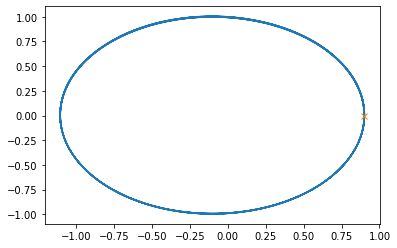

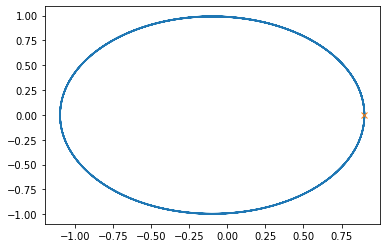

In [54]:
e = 0.1
q_0 = [1-e,0]
p_0 = [0, np.sqrt((1+e)/(1-e))]
T = 40
N = 1000

Courbe(RK2(q_0,p_0,T,N))
Courbe(PointMilieu(q_0,p_0,T,N))

**Remarque :** Avec ces paramètres, on ne voit pas vraiment de différence entre les deux schémas.

15) Même question pour $N = 100$.

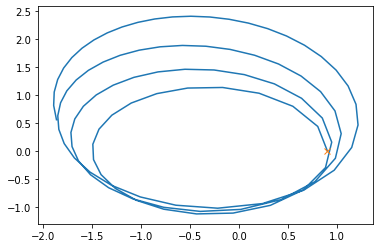

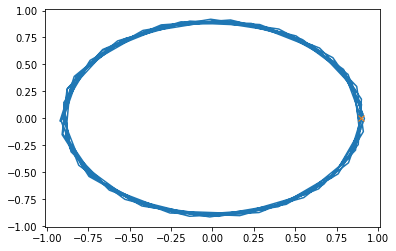

In [55]:
e = 0.1
q_0 = [1-e,0]
p_0 = [0, np.sqrt((1+e)/(1-e))]
T = 40
N = 100

Courbe(RK2(q_0,p_0,T,N))
Courbe(PointMilieu(q_0,p_0,T,N))

**Remarque :** on voit que le schéma symplectique est beaucoup moins sensible à la valeur du pas de temps $h = T/N$.

16) Même question pour $T = 400$ et $N = 10 000$.

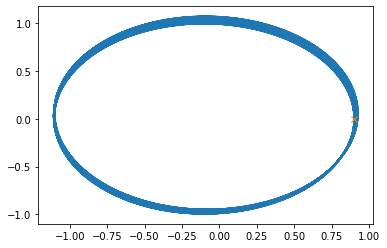

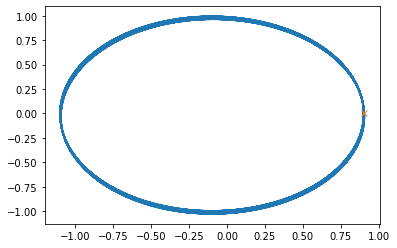

In [56]:
e = 0.1
q_0 = [1-e,0]
p_0 = [0, np.sqrt((1+e)/(1-e))]
T = 400
N = 10000

Courbe(RK2(q_0,p_0,T,N))
Courbe(PointMilieu(q_0,p_0,T,N))

**Remarque :** On voit que, sur le long terme (c'est-à-dire pour $T$ grand), le schéma symplectique dévie moins vite que le schéma RK2. On constate la même chose en traçant les deux fonctions hamiltoniennes (voir ci-dessous). 

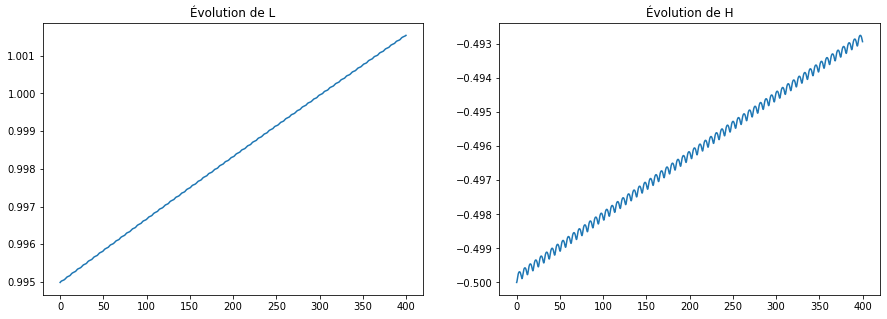

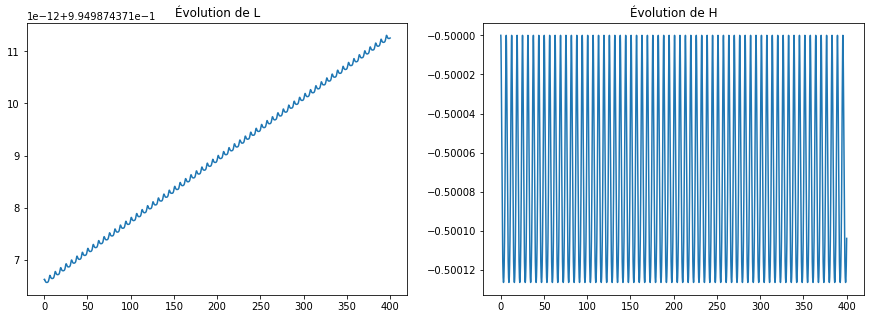

In [57]:
M = RK2(q_0,p_0,T,N)
temps = np.linspace(0,T,N+1)
Constantes(M,temps)

M = PointMilieu(q_0,p_0,T,N)
temps = np.linspace(0,T,N+1)
Constantes(M,temps)

17) Calculer la valeur analytique des fonctions constantes $L$ et $H$ définies à la question 5 pour $e=0.1$, $q_0 = [1-e,0]$, $p_0 = \left[0, \sqrt{\frac{1+e}{1-e}}\right]$.

**Réponse :** Pour tout $t$ on a
$$\left\lbrace\begin{array}{l}
    \displaystyle L(t) = L(0) = (1-e) \times \sqrt{\frac{1+e}{1-e}} = \sqrt{ (1-e)(1+e) } = \sqrt{1 - e^2} = \sqrt{0.99} = 0.9949874371, \\
    \displaystyle  H(t) = H(0) = \frac{1+e}{2(1-e)} - \frac{1}{1-e} = \frac{e-1}{2(1-e)} = - 0.5.
\end{array}\right.$$


18) Soient $L_{meth}(t_n)$ et $H_{meth}(t_n)$ les valeurs de $L$ et $H$ pour la solution approchée par la méthode $meth$ au point $t_n$. On note 
$$ \left\lbrace\begin{aligned}
  &e^L_N(meth) = \max_{0 \le n \le N}\big| L - L_{meth}(t_n) \big|, \\
  &e^H_N(meth) = \max_{0 \le n \le N}\big| H - H_{meth}(t_n) \big|,
\end{aligned}\right.$$
les erreurs d'approximation sur $L$ et $H$ pour la méthode $meth$.

Comparer l'évolution de ces deux erreurs en fonction du nombre d'itérations $N \in \{100,500,1000,2500,5000\}$, pour les 4 méthodes étudiées (tracer deux graphiques, l'un pour $e^L$ et l'autre pour $e^H$). On reprendra $e=0.1$, $q_0 = [1-e,0]$, $p_0 = \left[0, \sqrt{\frac{1+e}{1-e}}\right]$ et $T=40$.

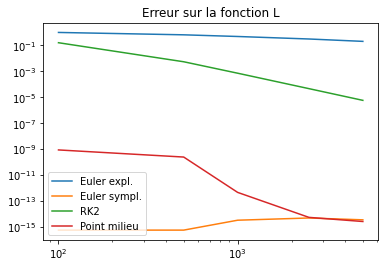

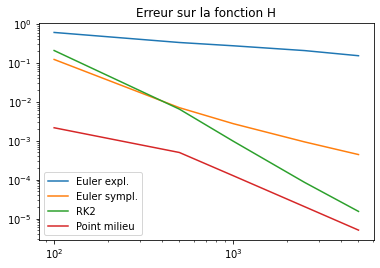

In [58]:
def fonctionL(q,p):
    return q[0]*p[1] - q[1]*p[0]

def fonctionH(q,p):
    norm_q = np.sqrt(q[0]**2 + q[1]**2) 
    norm_p = np.sqrt(p[0]**2 + p[1]**2) 
    return 0.5*norm_p**2 - 1/norm_q


e = 0.1
q_0 = [1-e,0]
p_0 = [0, np.sqrt((1+e)/(1-e))]
T = 40

Ltheo = np.sqrt(1 - e**2)
Htheo = -0.5

tab_N = np.array([100,500,1000,2500,5000])
Erreur_EulerExplicite = np.zeros((2,len(tab_N)))
Erreur_EulerSympl     = np.zeros((2,len(tab_N)))
Erreur_RK2            = np.zeros((2,len(tab_N)))
Erreur_PointMilieu    = np.zeros((2,len(tab_N)))


for i in range(len(tab_N)):
    N = tab_N[i]

    Sol_EulerExplicite         = EulerExplicite(q_0,p_0,T,N)
    L_EulerExplicite           = fonctionL(Sol_EulerExplicite[0:2],Sol_EulerExplicite[2:])
    H_EulerExplicite           = fonctionH(Sol_EulerExplicite[0:2],Sol_EulerExplicite[2:])
    Erreur_EulerExplicite[0,i] = np.max(np.abs(L_EulerExplicite - Ltheo))
    Erreur_EulerExplicite[1,i] = np.max(np.abs(H_EulerExplicite - Htheo))

    Sol_EulerSympl         = EulerSympl(q_0,p_0,T,N)
    L_EulerSympl           = fonctionL(Sol_EulerSympl[0:2],Sol_EulerSympl[2:])
    H_EulerSympl           = fonctionH(Sol_EulerSympl[0:2],Sol_EulerSympl[2:])
    Erreur_EulerSympl[0,i] = np.max(np.abs(L_EulerSympl - Ltheo))
    Erreur_EulerSympl[1,i] = np.max(np.abs(H_EulerSympl - Htheo))

    Sol_RK2         = RK2(q_0,p_0,T,N)
    L_RK2           = fonctionL(Sol_RK2[0:2],Sol_RK2[2:])
    H_RK2           = fonctionH(Sol_RK2[0:2],Sol_RK2[2:])
    Erreur_RK2[0,i] = np.max(np.abs(L_RK2 - Ltheo))
    Erreur_RK2[1,i] = np.max(np.abs(H_RK2 - Htheo))

    Sol_PointMilieu         = PointMilieu(q_0,p_0,T,N)
    L_PointMilieu           = fonctionL(Sol_PointMilieu[0:2],Sol_PointMilieu[2:])
    H_PointMilieu           = fonctionH(Sol_PointMilieu[0:2],Sol_PointMilieu[2:])
    Erreur_PointMilieu[0,i] = np.max(np.abs(L_PointMilieu - Ltheo))
    Erreur_PointMilieu[1,i] = np.max(np.abs(H_PointMilieu - Htheo))



plt.loglog(tab_N,Erreur_EulerExplicite[0,:],label="Euler expl.")
plt.loglog(tab_N,Erreur_EulerSympl[0,:],label="Euler sympl.")
plt.loglog(tab_N,Erreur_RK2[0,:],label="RK2")
plt.loglog(tab_N,Erreur_PointMilieu[0,:],label="Point milieu")
plt.title("Erreur sur la fonction L")
plt.legend()
plt.show()

plt.loglog(tab_N,Erreur_EulerExplicite[1,:],label="Euler expl.")
plt.loglog(tab_N,Erreur_EulerSympl[1,:],label="Euler sympl.")
plt.loglog(tab_N,Erreur_RK2[1,:],label="RK2")
plt.loglog(tab_N,Erreur_PointMilieu[1,:],label="Point milieu")
plt.title("Erreur sur la fonction H")
plt.legend()
plt.show()